In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import tukeylambda
import os


In [9]:
file_paths = [
    "/Users/vidhyakshayakannan/Documents/Cognitive Neuroscience Research/Python Experiments/data/mahalakshmi/Mahalakshmi1.1.csv",
    "/Users/vidhyakshayakannan/Documents/Cognitive Neuroscience Research/Python Experiments/data/mahalakshmi/Mahalakshmi1.2.csv",
    "/Users/vidhyakshayakannan/Documents/Cognitive Neuroscience Research/Python Experiments/data/mahalakshmi/Mahalakshmi1.3.csv"
]

# Check if files exist
for file in file_paths:
    if not os.path.exists(file):
        print(f"Error: {file} does not exist.")
        exit()

# Extract participant name
participant_name = os.path.basename(os.path.dirname(file_paths[0])).capitalize()

# Read CSV files
df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Ensure 'Key' column is a string
df['Key'] = df['Key'].astype(str)

# Correct responses
correct_1_M = ((df["Tone"] == 1) & (df["Key"] == "M")).sum()
correct_2_C = ((df["Tone"] == 2) & (df["Key"] == "C")).sum()

# Total counts
total_1_M = (df["Tone"] == 1).sum()
total_2_C = (df["Tone"] == 2).sum()
total_count = len(df)

# Accuracy calculations
accuracy_1_M = (correct_1_M / total_1_M) * 100 if total_1_M > 0 else 0
accuracy_2_C = (correct_2_C / total_2_C) * 100 if total_2_C > 0 else 0

correct_count = correct_1_M + correct_2_C
incorrect_count = total_count - correct_count
overall_accuracy = (correct_count / total_count) * 100 if total_count > 0 else 0

# Print results
print(f"Participant: {participant_name}")
print(f"In-tune correct: {correct_1_M} / {total_1_M} ({accuracy_1_M:.2f}%)")
print(f"Out-of-tune correct: {correct_2_C} / {total_2_C} ({accuracy_2_C:.2f}%)")
print(f"Correct responses: {correct_count}")
print(f"Incorrect responses: {incorrect_count}")
print(f"Overall accuracy: {overall_accuracy:.2f}%")

Participant: Mahalakshmi
In-tune correct: 133 / 138 (96.38%)
Out-of-tune correct: 131 / 138 (94.93%)
Correct responses: 264
Incorrect responses: 12
Overall accuracy: 95.65%


In [10]:
df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)
print(df.head())


   Gap  Tone  tGap Key    RT
0  330     2   330   C   827
1  310     1   310   M  1424
2  130     2   130   C   944
3  240     2   240   C  1156
4   80     2    80   C  1434


In [11]:
print(df)

     Gap  Tone  tGap Key    RT
0    330     2   330   C   827
1    310     1   310   M  1424
2    130     2   130   C   944
3    240     2   240   C  1156
4     80     2    80   C  1434
..   ...   ...   ...  ..   ...
271  300     1   300   C   506
272  430     2   430   C   505
273   90     1    90   M   547
274  220     2   220   C   577
275  150     1   150   M   920

[276 rows x 5 columns]


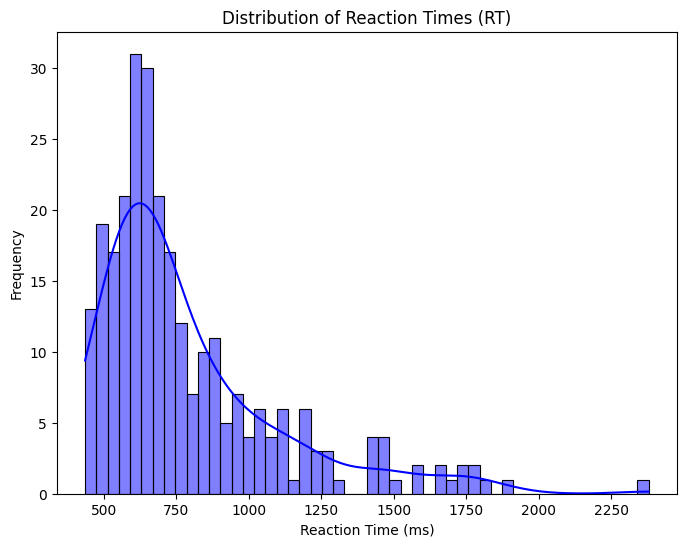

In [12]:
# Plot histogram with all RT values
plt.figure(figsize=(8, 6))
sns.histplot(df['RT'], bins=50, kde=True, color='blue')  # Use original RT values
plt.title("Distribution of Reaction Times (RT)")
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Remove outliers based on RT range
df = df[(df['RT'] >= 199) & (df['RT'] <= 1000)].copy()

In [14]:
df

,Gap,Tone,tGap,Key,RT
0,330,2,330,C,827
2,130,2,130,C,944
8,190,2,190,C,836
13,70,2,70,C,991
15,180,1,180,M,891
...,...,...,...,...,...
271,300,1,300,C,506
272,430,2,430,C,505
273,90,1,90,M,547
274,220,2,220,C,577


In [15]:
df = df[(df["Tone"] == 1) & (df["Key"] == "M") | (df["Tone"] == 2) & (df["Key"] == "C")]

In [16]:
df

,Gap,Tone,tGap,Key,RT
0,330,2,330,C,827
2,130,2,130,C,944
8,190,2,190,C,836
13,70,2,70,C,991
15,180,1,180,M,891
...,...,...,...,...,...
270,80,2,80,C,454
272,430,2,430,C,505
273,90,1,90,M,547
274,220,2,220,C,577


In [17]:
# Sort in ascending order by Gap
df = df.sort_values(by='Gap').copy()

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     Gap  Tone  tGap Key   RT
231   50     1    50   M  645
133   50     1    50   M  718
64    50     2    50   C  857
230   50     2    50   C  517
33    50     1    50   M  959
126   50     2    50   C  780
176   60     1    60   M  533
227   60     2    60   C  502
257   60     1    60   M  438
21    60     2    60   C  986
108   60     2    60   C  606
57    60     1    60   M  656
204   70     1    70   M  622
13    70     2    70   C  991
110   70     2    70   C  675
134   70     1    70   M  836
220   70     2    70   C  684
187   80     1    80   M  611
25    80     1    80   M  909
162   80     2    80   C  704
270   80     2    80   C  454
132   80     1    80   M  790
195   90     2    90   C  564
173   90     1    90   M  678
44    90     2    90   C  683
135   90     2    90   C  595
273   90     1    90   M  547
56   100     2   100   C  690
258  100     2   100   C  530
138  100     2   100   C  503
97   100     1   100   M  540
196  100     1   100   M  533
146  110  

In [19]:
# Examine the data
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
              Gap       Tone        tGap          RT
count  216.000000  216.00000  216.000000  216.000000
mean   267.870370    1.50463  267.870370  659.865741
std    134.869797    0.50114  134.869797  135.530021
min     50.000000    1.00000   50.000000  435.000000
25%    150.000000    1.00000  150.000000  558.250000
50%    260.000000    2.00000  260.000000  643.500000
75%    382.500000    2.00000  382.500000  730.000000
max    500.000000    2.00000  500.000000  991.000000


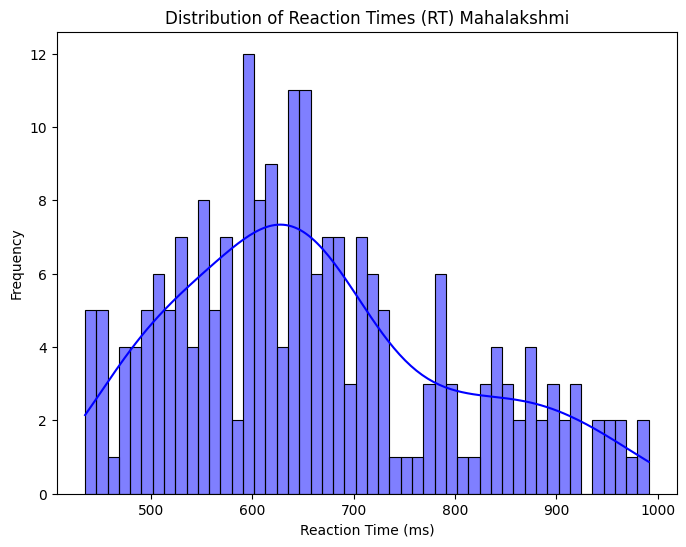

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['RT'], bins=50, kde=True, color='blue')  
str = f"Distribution of Reaction Times (RT) {participant_name}"
plt.title(str)
plt.xlabel("Reaction Time (ms)")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Create a new DataFrame with unique Gap values
soumAve = pd.DataFrame({'Gap': df['Gap'].unique()})

# Compute mean RT for Tone == 1 and Tone == 2
soumAve['InAveRT'] = soumAve['Gap'].apply(lambda g: df.loc[(df['Gap'] == g) & (df['Tone'] == 1), 'RT'].mean())
soumAve['OutAveRT'] = soumAve['Gap'].apply(lambda g: df.loc[(df['Gap'] == g) & (df['Tone'] == 2), 'RT'].mean())

# Filter the dataframe based on Tone values
soumIn = df[df['Tone'] == 1].copy()
soumOut = df[df['Tone'] == 2].copy()

# Display results
print(soumAve)
print(soumIn)
print(soumOut)


    Gap     InAveRT    OutAveRT
0    50  774.000000  718.000000
1    60  542.333333  698.000000
2    70  729.000000  783.333333
3    80  770.000000  579.000000
4    90  612.500000  614.000000
5   100  536.500000  574.333333
6   110  653.000000  743.500000
7   120  672.500000  605.000000
8   130  575.000000  694.000000
9   140  657.666667  670.500000
10  150  813.000000  668.333333
11  160  731.000000  681.500000
12  170  666.000000  655.000000
13  180  741.666667  740.000000
14  190  732.000000  808.333333
15  200  662.333333  813.333333
16  210  594.500000  721.500000
17  220  673.666667  586.500000
18  230  641.000000  670.666667
19  240  653.000000  905.000000
20  250  638.333333  515.000000
21  260  514.000000  660.500000
22  270  638.500000  785.666667
23  280  562.000000  678.333333
24  290  712.000000  674.500000
25  300  825.000000  686.666667
26  310  670.000000  744.000000
27  320  614.500000  634.000000
28  330  492.000000  696.000000
29  340  696.000000  840.500000
30  350 

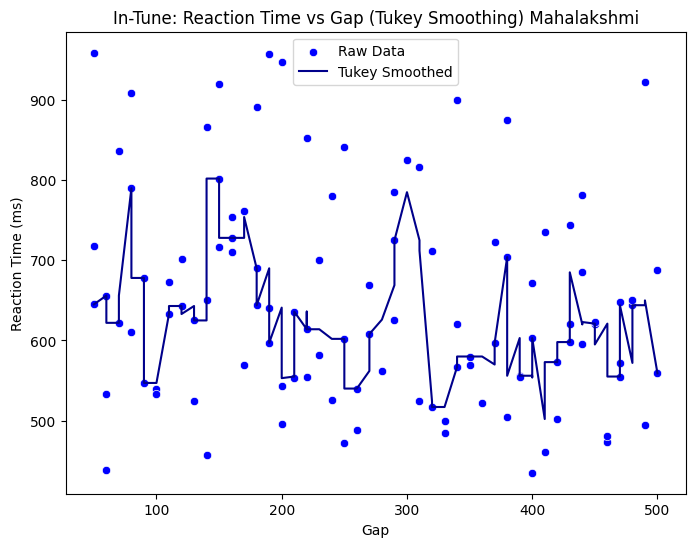

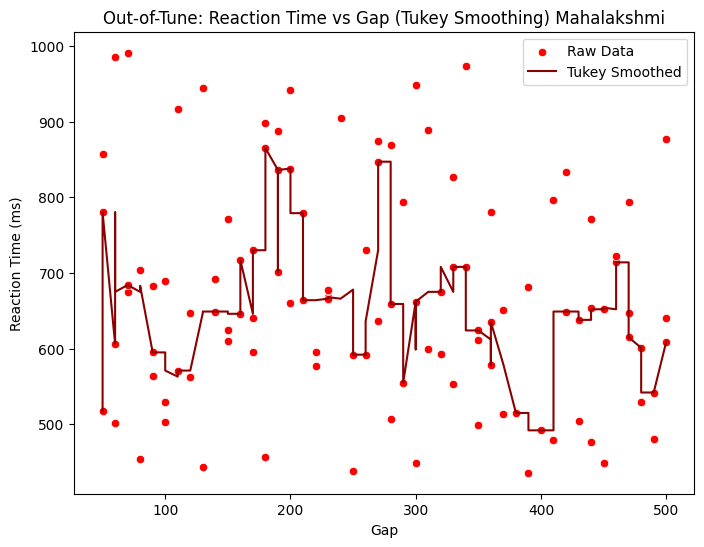

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt

# Filter df for Tone == 1 and Tone == 2
soumIn = df[df['Tone'] == 1].copy()
soumOut = df[df['Tone'] == 2].copy()

# Apply Tukey smoothing (Running Median Filter)
window_size = 5  # Adjust for different smoothing levels (should be odd)
soumIn['RT_Tukey'] = medfilt(soumIn['RT'], kernel_size=window_size)
soumOut['RT_Tukey'] = medfilt(soumOut['RT'], kernel_size=window_size)

# Plot for soumIn (In-Tune) - Tukey Smoothing
plt.figure(figsize=(8, 6))
sns.scatterplot(x=soumIn['Gap'], y=soumIn['RT'], color='blue', label="Raw Data")
plt.plot(soumIn['Gap'], soumIn['RT_Tukey'], color='darkblue', linestyle='-', label="Tukey Smoothed")
str = f"In-Tune: Reaction Time vs Gap (Tukey Smoothing) {participant_name}"
plt.title(str)
plt.xlabel("Gap")
plt.ylabel("Reaction Time (ms)")
plt.legend()
plt.show()

# Plot for soumOut (Out-of-Tune) - Tukey Smoothing
plt.figure(figsize=(8, 6))
sns.scatterplot(x=soumOut['Gap'], y=soumOut['RT'], color='red', label="Raw Data")
plt.plot(soumOut['Gap'], soumOut['RT_Tukey'], color='darkred', linestyle='-', label="Tukey Smoothed")
str = f"Out-of-Tune: Reaction Time vs Gap (Tukey Smoothing) {participant_name}"
plt.title(str)
plt.xlabel("Gap")
plt.ylabel("Reaction Time (ms)")
plt.legend()
plt.show()


[[ 50.         690.19306545]
 [ 50.         690.19306545]
 [ 50.         690.19306545]
 [ 60.         678.98596296]
 [ 60.         678.98596296]
 [ 60.         678.98596296]
 [ 70.         665.57899587]
 [ 70.         665.57899587]
 [ 80.         652.09523884]
 [ 80.         652.09523884]
 [ 80.         652.09523884]
 [ 90.         647.94991563]
 [ 90.         647.94991563]
 [100.         638.87659227]
 [100.         638.87659227]
 [110.         624.356947  ]
 [110.         624.356947  ]
 [120.         635.05627374]
 [120.         635.05627374]
 [130.         667.4705258 ]
 [130.         667.4705258 ]
 [140.         691.24862645]
 [140.         691.24862645]
 [140.         691.24862645]
 [150.         707.62633292]
 [150.         707.62633292]
 [150.         707.62633292]
 [160.         721.04355958]
 [160.         721.04355958]
 [160.         721.04355958]
 [170.         715.12227685]
 [170.         715.12227685]
 [180.         688.4483181 ]
 [180.         688.4483181 ]
 [180.        

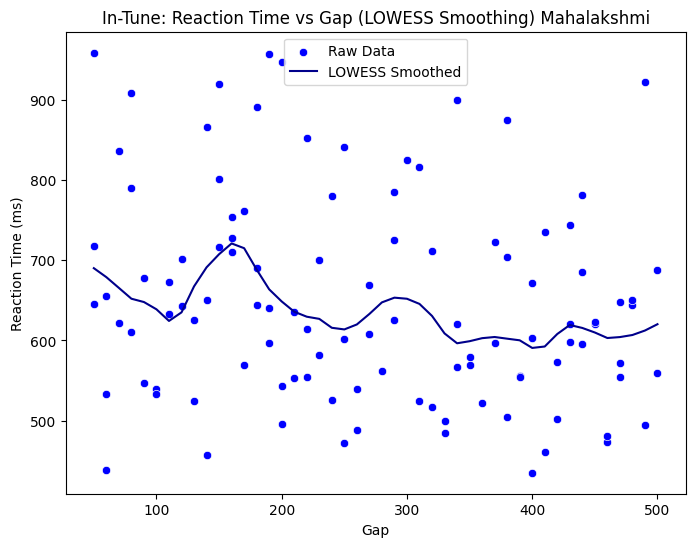

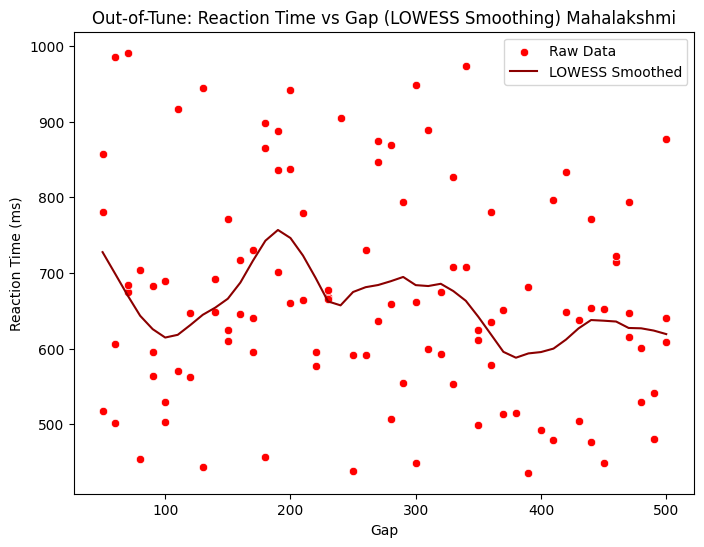

In [23]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply LOWESS smoothing
frac = 0.2
smooth_in = lowess(soumIn['RT'], soumIn['Gap'], frac=frac)
smooth_out = lowess(soumOut['RT'], soumOut['Gap'], frac=frac)
print(smooth_in)
print(smooth_out)
# Plot for soumIn (In-Tune) - LOWESS Smoothing
plt.figure(figsize=(8, 6))
sns.scatterplot(x=soumIn['Gap'], y=soumIn['RT'], color='blue', label="Raw Data")
plt.plot(smooth_in[:, 0], smooth_in[:, 1], color='darkblue', linestyle='-', label="LOWESS Smoothed")
str = f"In-Tune: Reaction Time vs Gap (LOWESS Smoothing) {participant_name}"
plt.title(str)
plt.xlabel("Gap")
plt.ylabel("Reaction Time (ms)")
plt.legend()
plt.show()

# Plot for soumOut (Out-of-Tune) - LOWESS Smoothing
plt.figure(figsize=(8, 6))
sns.scatterplot(x=soumOut['Gap'], y=soumOut['RT'], color='red', label="Raw Data")
plt.plot(smooth_out[:, 0], smooth_out[:, 1], color='darkred', linestyle='-', label="LOWESS Smoothed")
str = f"Out-of-Tune: Reaction Time vs Gap (LOWESS Smoothing) {participant_name}"
plt.title(str)
plt.xlabel("Gap")
plt.ylabel("Reaction Time (ms)")
plt.legend()
plt.show()
